#Heart disease using Logistic Regression

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score

In [5]:
df = pd.read_csv("heart.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [6]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [7]:
df.corr()['target'].abs().sort_values(ascending=False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

In [8]:
cat=['sex','cp','fbs','exang','ca','thal']
num=[col for col in df.columns if (col not in cat) and (col!='target')]
cat, num

(['sex', 'cp', 'fbs', 'exang', 'ca', 'thal'],
 ['age', 'trestbps', 'chol', 'restecg', 'thalach', 'oldpeak', 'slope'])

additional info : 1= male, 0=female

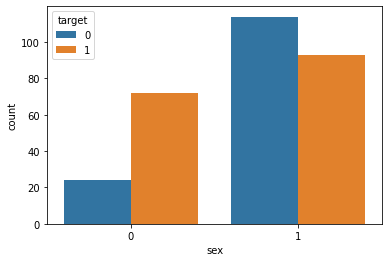

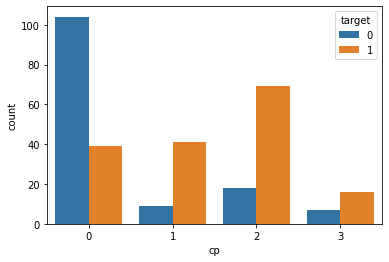

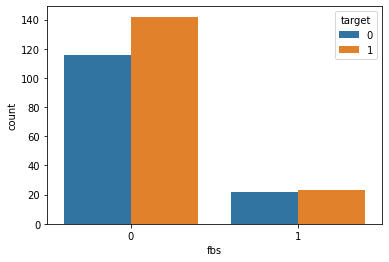

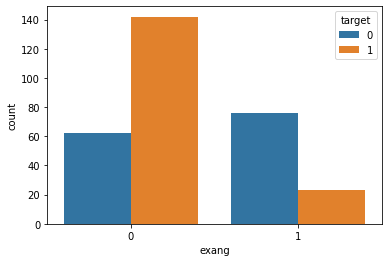

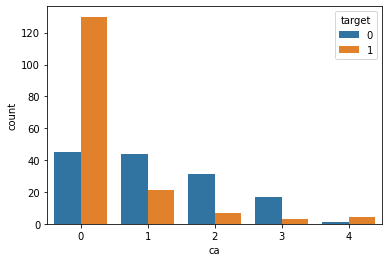

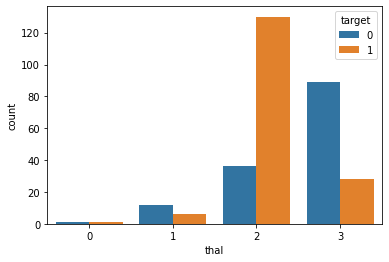

In [9]:
for col in cat:
  sns.countplot(x=col,hue='target',data=df)
  plt.show()


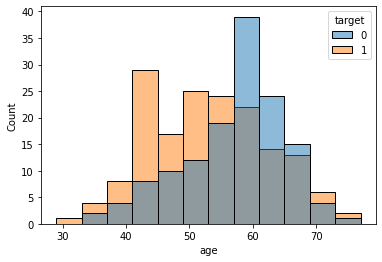

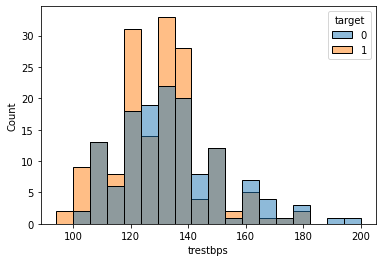

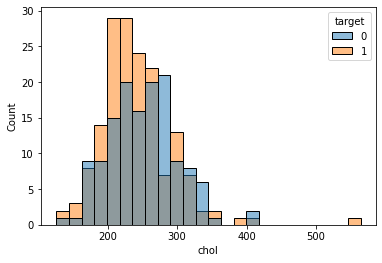

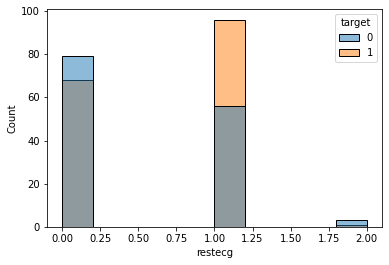

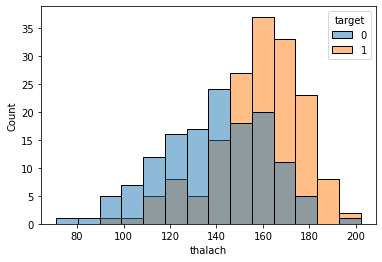

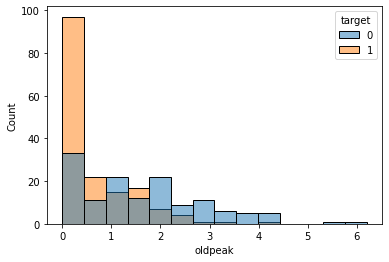

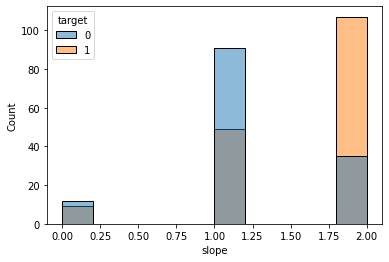

In [10]:
for col in num:
  sns.histplot(x=col,hue='target',data=df)
  plt.show()

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(df.drop(['target','fbs','chol','restecg'],axis=1), 
                                                    df['target'], 
                                                    test_size=0.30, 
                                                    random_state=200)


In [12]:
logreg=LogisticRegression()
logreg.fit(X_train,Y_train)
Y_predict=logreg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


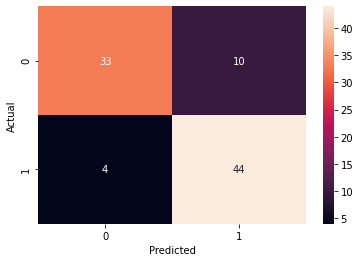

In [13]:
cm=pd.crosstab(Y_test,Y_predict,rownames=['Actual'],colnames=['Predicted'])
sns.heatmap(cm,annot=True)

In [14]:
accuracy_score(Y_test,Y_predict)

0.8461538461538461

In [16]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,Y_predict)

0.8420542635658914